In [79]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import random
from sklearn.metrics.cluster import normalized_mutual_info_score
% matplotlib inline

from src.folds.folds import CustomFold 

In [80]:
data_path = "../../data/original/train.h5"
df = pd.read_hdf(data_path, key='table')
train_data = df['s'][:]
y_train_data = df['ttf']

folds = CustomFold(n_splits=10, pad=0, fragmentation=0.0)

## Split

In [81]:
(train_index, valid_index) = folds.split(train_data).__next__()
X_train, X_valid = train_data.iloc[train_index], train_data.iloc[valid_index]
y_train, y_valid = y_train_data.iloc[train_index], y_train_data.iloc[valid_index]

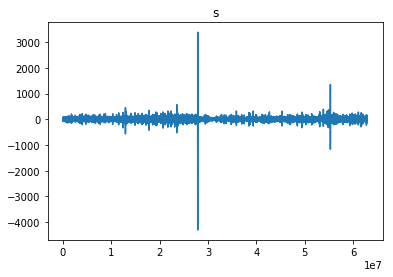

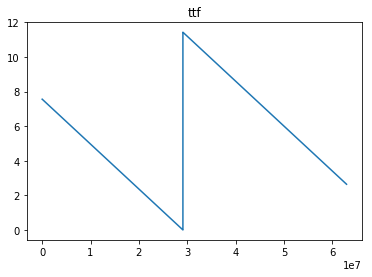

In [82]:
plt.figure()
plt.plot(X_valid.values)
plt.title('s')
plt.show()

plt.figure()
plt.plot(y_valid.values)
plt.title('ttf')
plt.show()

## 150k Sample

In [83]:
chunk_size = int(15e4)
idx = random.randint(0, len(X_valid) - chunk_size)
x_sample = X_valid.iloc[idx:idx+chunk_size]
y_sample = y_valid.iloc[idx:idx+chunk_size]
print(idx)

22789781


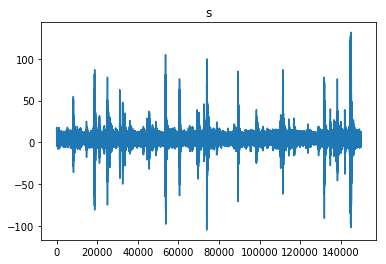

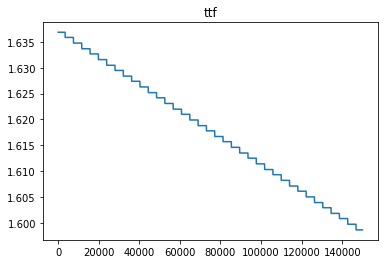

In [84]:
plt.figure()
plt.plot(x_sample.values)
plt.title('s')
plt.show()

plt.figure()
plt.plot(y_sample.values)
plt.title('ttf')
plt.show()

## Correlation

In [85]:
cor_valid = signal.fftconvolve(X_valid, x_sample[::-1], mode='valid')
max_cor_pos_valid = np.argmax(cor_valid)
print(max_cor_pos_valid)

27720762


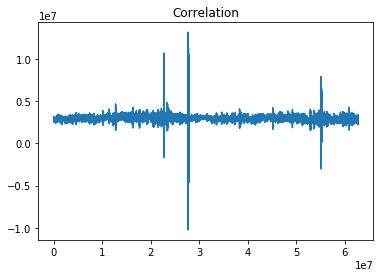

In [86]:
plt.figure()
plt.plot(cor_valid)
plt.title('Correlation')
plt.show()

In [87]:
cor = signal.fftconvolve(X_train, x_sample[::-1], mode='valid')
max_cor_pos = np.argmax(cor)
print(max_cor_pos)

186283205


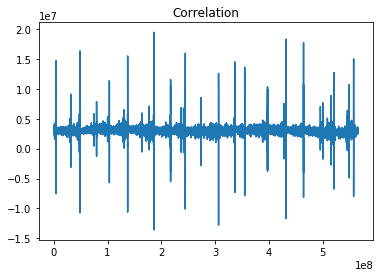

In [88]:
plt.figure()
plt.plot(cor)
plt.title('Correlation')
plt.show()

## Mutual Info

In [89]:
mi = []
bins = np.arange(-2000.0, 2000.0, 2.)
x_sample = np.digitize(x_sample.values, bins)
print(x_sample)
print("len valid", len(X_valid))
stepsize = 10000

for i in range(0, len(X_valid)-len(x_sample), stepsize):
    
    x = X_valid.iloc[i: i+len(x_sample)]
    x = np.digitize(x.values, bins)
    mi_0 = normalized_mutual_info_score(x, x_sample)
    print(f"{i} {mi_0}", end="\r")
    mi.append(mi_0)

[1002 1001 1000 ... 1005 1004 1004]
len valid 62914548


6277


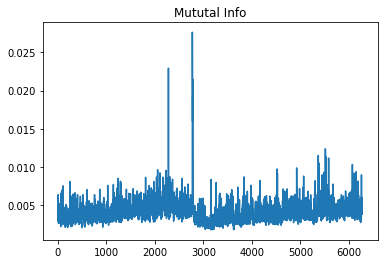

In [90]:
print(len(mi))
plt.figure()
plt.plot(mi)
plt.title('Mututal Info')
plt.show()

In [91]:
max_mi_idx = np.argmax(mi)*stepsize
print("max  mi idx", max_mi_idx)
print("pred ttf", y_valid.iloc[max_mi_idx])
print("true ttf", y_sample.iloc[-1])


max  mi idx 27720000
pred ttf 0.35689624299
true ttf 1.5985964509000001
